In [1]:
#Import libraries
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

%matplotlib widget
import matplotlib.pyplot as plt 


# **Load data**

In [2]:
#select training set 
train = pd.read_csv('train_2.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#select test set
test = pd.read_csv('test_2.csv')
print(test.shape)

test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = (train.iloc[:, 1:].values).astype('float32')
y_train = (train.iloc[:, 0].values).astype('int32')

X_test = test.values.astype('float32')

In [5]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

# Visualizing the Data

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
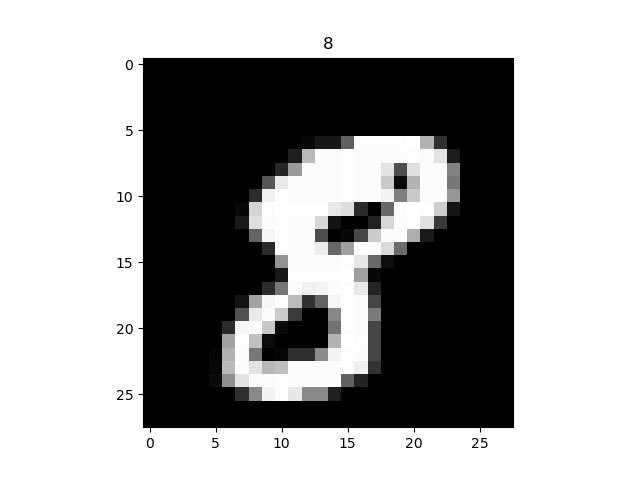

In [7]:
X_reshaped = X_train.reshape(X_train.shape[0], 28, 28)

plt.figure()
plt.imshow(X_reshaped[10], cmap=plt.get_cmap('gray'))
plt.title(y_train[10]);

# Tensorflow Model Implementation

In [8]:
tf.random.set_seed(1234)

#relu in fisrt two layers - because we are working with Multiclass Classification problem (not binary classification). 
#linear in the last layers - more accurate implementation of softmax
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(40, activation='relu', name='L1'),
        Dense(15, activation='relu', name='L2'),
        Dense(10, activation='linear', name='L3'),
    ], name = 'model'
)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 40)                31400     
                                                                 
 L2 (Dense)                  (None, 15)                615       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 32,175
Trainable params: 32,175
Non-trainable params: 0
_________________________________________________________________


In [10]:
#getting layers
[layer1, layer2, layer3] = model.layers

In [11]:
#getting info about each layer
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 40), b1 shape = (40,)
W2 shape = (40, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [12]:
#from_logits=True - more accurate implementation of softmax
#Adam optimization has defalult initial learning rate Alpha (instead of Gradient Descent).
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)

history = model.fit(X_train, y_train, epochs=40)

Epoch 1/40
1313/1313 [==============================] - 2s 1ms/step - loss: 2.3917
Epoch 2/40
1313/1313 [==============================] - 1s 1ms/step - loss: 1.2929
Epoch 3/40
1313/1313 [==============================] - 1s 1ms/step - loss: 1.1023
Epoch 4/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.9216
Epoch 5/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6202
Epoch 6/40
1313/1313 [==============================] - 1s 1ms/step - loss: 0.3980
Epoch 7/40
1313/1313 [==============================] - 1s 1ms/step - loss: 0.3053
Epoch 8/40
1313/1313 [==============================] - 1s 1ms/step - loss: 0.2437
Epoch 9/40
1313/1313 [==============================] - 1s 998us/step - loss: 0.2077
Epoch 10/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1853
Epoch 11/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1670
Epoch 12/40
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1541

1/1 [==============================] - 0s 85ms/step
 predicting : 
[[51.136646 51.277985 46.173622 41.272236 66.37366  33.132767 15.166649
  59.9793   36.84864  55.669197]]
 Largest Prediction index: 4


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
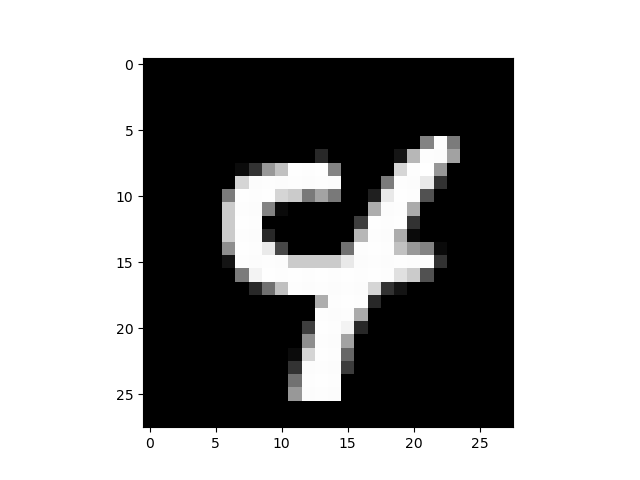

In [15]:
#Check results with one digit

image_of_four = X_test[255] #digit is 4
plt.figure()
plt.imshow(image_of_four.reshape((28,28)),cmap='gray')


prediction = model.predict(image_of_four.reshape(1,784))
print(f" predicting : \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")


In [16]:
#getting probability (Total is 1)
prediction_p = tf.nn.softmax(prediction)

print(f" predicting. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting. Probability vector: 
[[2.4094351e-07 2.7752219e-07 1.6846171e-09 1.2527264e-11 9.9830902e-01
  3.6553559e-15 5.7589572e-23 1.6681366e-03 1.5021495e-13 2.2406655e-05]]
Total of predictions: 1.000


In [17]:
#To return an integer representing the predicted target, you want the index of the largest probability.
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 4


In [18]:
#Create submissions csv with all results.

results = model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)

875/875 [==============================] - 1s 2ms/step


In [19]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
